projeto desenvolvido para avaliar o perfil de renda de novos clientes


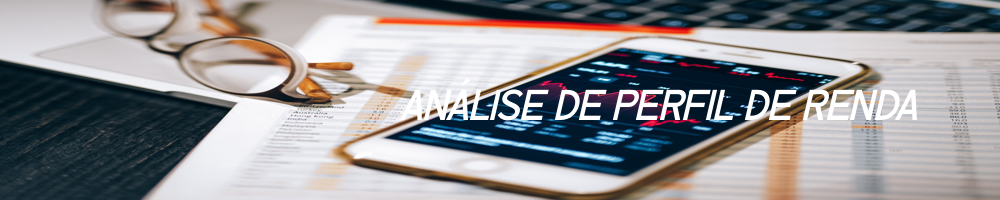

In [58]:
   
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from termcolor import colored


image = Image.open(r'/content/img/img.jpg')  
image=image.resize((1000,200))

draw = ImageDraw.Draw(image) 
  
font = ImageFont.truetype(r'/content/fonte/BALLAD ITALIC.otf', 23) 

print('projeto desenvolvido para avaliar o perfil de renda de novos clientes')
  
text = 'ANÁLISE DE PERFIL DE RENDA'


draw.text((400, 70), text,font = font,color='red') 

 
#image_cinza=image.convert(mode="A")

image

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm
import os
# Fixing random state for reproducibility
np.random.seed(2360873)

df= pd.read_csv('/content/Profissao- Cientista de Dados_M10_support material (1).csv')
df

In [ ]:
print(df.describe())

         Unnamed: 0         index    qtd_filhos        idade  tempo_emprego  \
count  15000.000000  15000.000000  15000.000000  15000.00000   12466.000000   
mean    7499.500000   8298.753467      0.437267     43.84140       7.750462   
std     4330.271354   4800.904442      0.760594     11.22917       6.780216   
min        0.000000      0.000000      0.000000     22.00000       0.191781   
25%     3749.750000   4111.750000      0.000000     34.00000       3.016438   
50%     7499.500000   8330.500000      0.000000     43.00000       6.016438   
75%    11249.250000  12469.000000      1.000000     53.00000      10.183562   
max    14999.000000  16649.000000     14.000000     68.00000      42.906849   

       qt_pessoas_residencia         renda  
count           15000.000000  15000.000000  
mean                2.219067   4624.632946  
std                 0.922352   4628.571729  
min                 1.000000    159.900000  
25%                 2.000000   1945.740000  
50%               

In [ ]:
df.drop(['Unnamed: 0','index','mau'], axis=1)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


In [ ]:
#[Variáveis quantitativas: qtd_filhos ,idade,	tempo_emprego,	qt_pessoas_residencia,renda]
#1) Avaliação da estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" 
#e através da avaliação gráfica da matriz de correlações.

df1 = df[['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]

df1.corr()



,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


,x,y
x,1.000000,0.394235
y,0.394235,1.000000


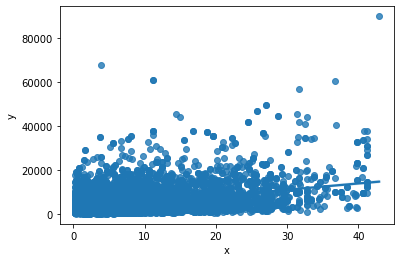

In [ ]:
x = df['tempo_emprego']
y = df['renda']
df1 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df1)
df1.corr()

,x,y
x,1.000000,0.009567
y,0.009567,1.000000


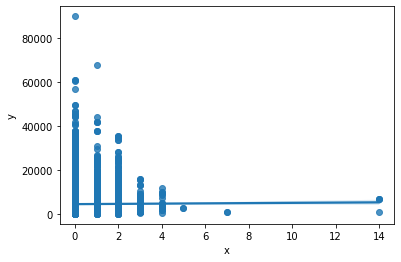

In [ ]:
x = df['qtd_filhos']
y = df['renda']
df1 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df1)
df1.corr()

,x,y
x,1.000000,0.020977
y,0.020977,1.000000


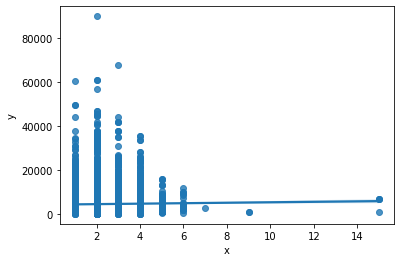

In [ ]:
x = df['qt_pessoas_residencia']
y = df['renda']
df1 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df1)
df1.corr()

,x,y
x,1.00000,0.04257
y,0.04257,1.00000


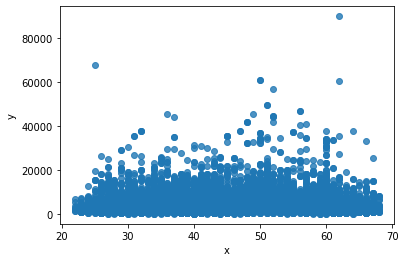

In [ ]:
x = df['idade']
y = df['renda']
df1 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df1)
df1.corr()

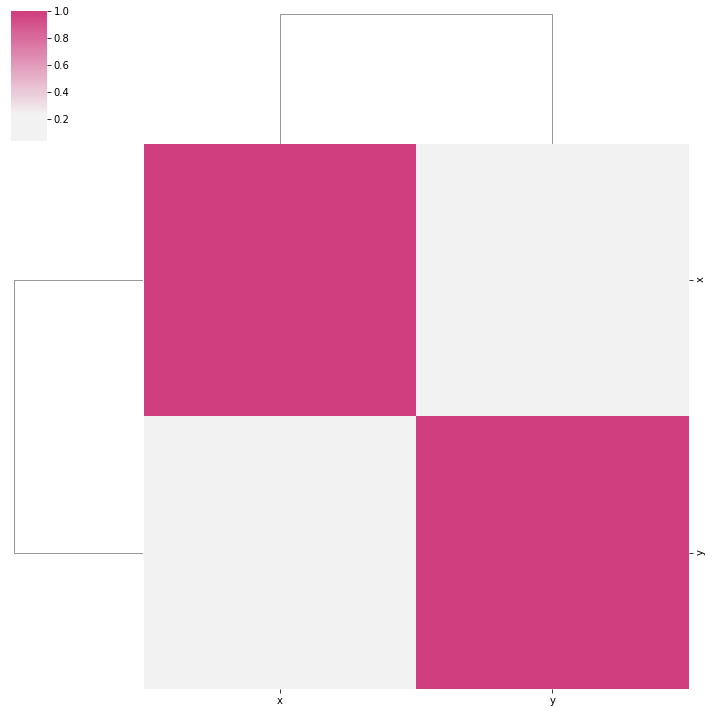

In [ ]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df1.corr(), figsize=(10, 10), center = 0, cmap=cmap)

2) Gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

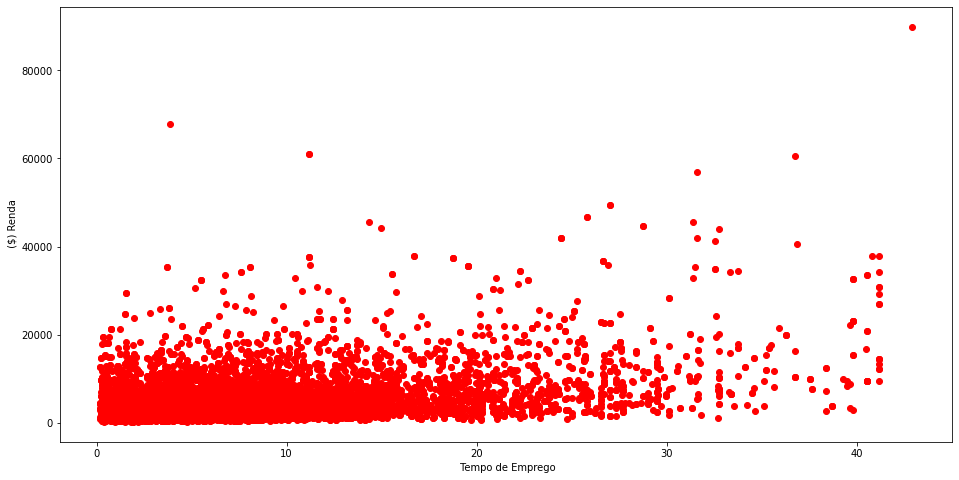

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(
    df['tempo_emprego'], 
    df['renda'], 
    c='red')
plt.xlabel(" Tempo de Emprego")
plt.ylabel(" ($) Renda")
plt.show()

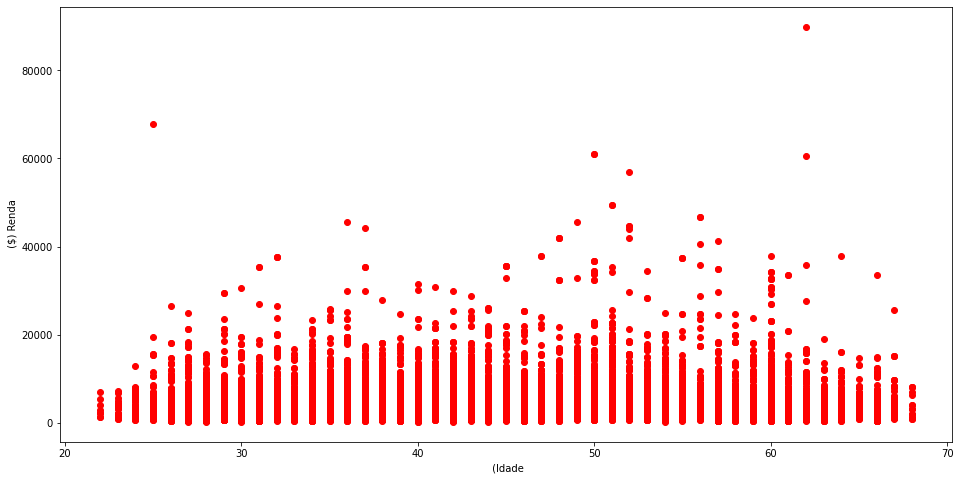

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(
    df['idade'], 
    df['renda'], 
    c='red')
plt.xlabel(" (Idade")
plt.ylabel(" ($) Renda")
plt.show()

In [ ]:
#criando modelo para prever a renda :
X = df['renda'].values.reshape(-1,1)
y = df['idade'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Previsão de Renda = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Previsão de Renda = 43.364 + 0.00010328X


In [ ]:
#criando um modelo para prever a renda:
X = df['renda'].values.reshape(-1,1)
y = df['qtd_filhos'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Previsão de Renda = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Previsão de Renda = 0.43 + 1.572e-06X


Plotando o modelo em cima dos dados

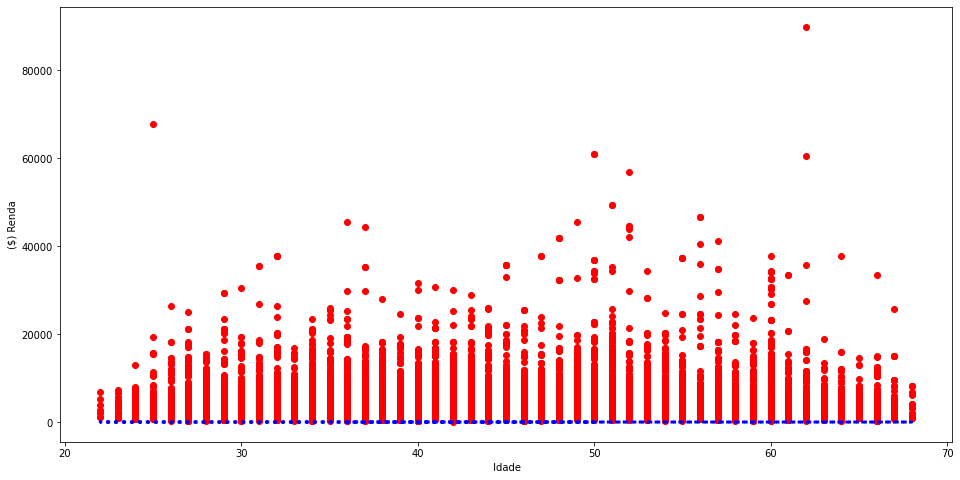

In [ ]:
X = df['renda'].values.reshape(-1,1)
y = df['idade'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)

f_previsaoes = reg.predict(X)


plt.figure(figsize = (16,8))
plt.scatter(
    df['idade'], 
    df['renda'], 
    c='red')


plt.plot(
    df['idade'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" Idade")
plt.ylabel("($) Renda")
plt.show()

In [ ]:
X = df['renda']
y = df['idade']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  idade   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     27.23
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           1.83e-07
Time:                        19:51:26   Log-Likelihood:                -57548.
No. Observations:               15000   AIC:                         1.151e+05
Df Residuals:                   14998   BIC:                         1.151e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.3638      0.129    334.863      0.0

4) Calculando o logaritmo da variável renda e repetindo a sequência de análise

,x,y
x,1.00000,0.04257
y,0.04257,1.00000


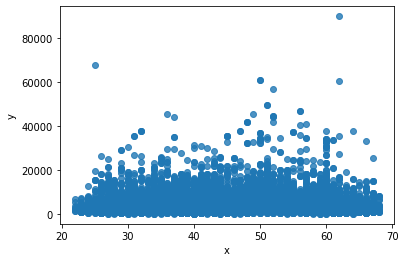

In [ ]:
from pandas.core.arrays.interval import is_datetime64_dtype
N = 1000
x = df['idade']
y = df['renda']
df4 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df4)
df4.corr()

In [ ]:
df4_rank = pd.concat([df4, df4.rank()], axis = 1)

df4_rank.columns = ['x', 'y', 'x_rank', 'y_rank']
df4_rank

,x,y,x_rank,y_rank
0,36,3369.24,4421.5,7702.5
1,42,6096.14,7095.0,11716.5
2,31,5658.98,2291.5,11265.0
3,50,7246.69,10196.5,12603.0
4,52,4017.37,10956.0,9033.5
...,...,...,...,...
14995,37,1193.29,4863.5,1451.5
14996,30,2519.18,1874.5,5514.5
14997,40,1586.85,6209.0,2577.5
14998,47,6975.39,9097.0,12427.5


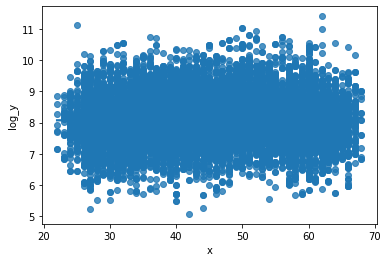

In [ ]:
df4_log = df4.copy()
df4_log['log_y'] = np.log(df4_log['y'])

_ = sns.regplot(x='x', y='log_y', data = df4_log)

projeto desenvolvido para avaliar o perfil de renda de novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Foi feito o levantamento de dados de alguns clientes, comprovando suas rendas através de olerites e outros documentos. Objetivo é construir um modelo preditivo para esta renda com base em algumas variáveis que já estão armazenadas em seu banco de dados.

Temos a variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

temos um arquivo ```previsao_de_renda.csv```. que foi carregado em um *dataframe*.


1)Foi avaliado a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. 

2) Foi avaliado um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*: tempo_empredo e idade.

3) Foi criado um modelo para prever a renda, onde os dois primeiros valores são as constantes geradas pelo modelo, e o "X" representa a renda.

4) Foi feita a plotagem do nosso modelo em cima dos dados e analisado se ele é bom, ruim, explica muito ou explica pouco o comportamento de nossos dados.

5) Analisando o perfil de renda com base na idade, foi possível verificar que clientes com idade na média dos 50 anos possuem uma renda maior, mais significativa, quase na mesma posição que os clientes que não possuem filhos. Foi verificado também que quanto menos pessoas na residência maior a renda.

6) Foi verificado outliers na variável renda, pois existe variáveis bem mais distante da média que as demais.

7) Foi calculado o logaritmo da variável renda e repetido a sequência de análise.